In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TSLA.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


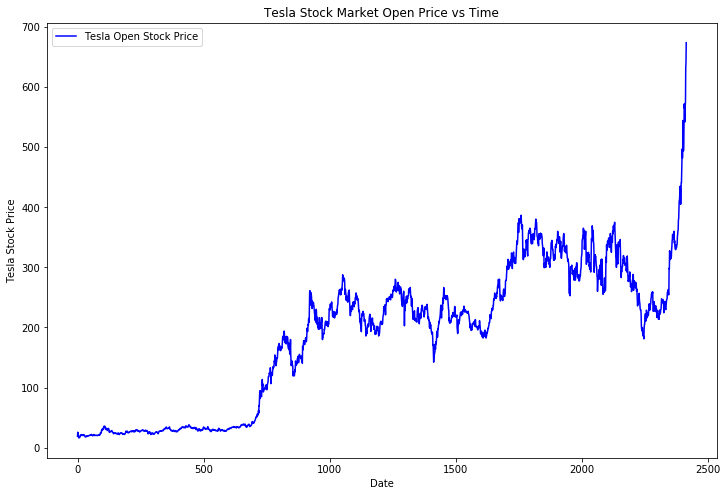

In [4]:
plt.figure(figsize=(12,8))  
plt.plot(data['Open'], color='blue', label='Tesla Open Stock Price')  
plt.title('Tesla Stock Market Open Price vs Time')  
plt.xlabel('Date')  
plt.ylabel('Tesla Stock Price')  
plt.legend()  
plt.show()  

In [5]:
data['Date'] = pd.to_datetime(data['Date']) 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
X = np.array(data['Open'])
X = X.reshape(X.shape[0],1)
X.shape

(2416, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X) 

In [8]:
train = X[:2000]
test = X[2000:]

In [9]:
print(train.shape,'\n',test.shape)

(2000, 1) 
 (416, 1)


In [10]:
#Create X_train using 60 timesteps for each sample and 1 output
X_train = []
y_train = []
for i in range(60, train.shape[0]):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
print(X_train.shape,'\n',y_train.shape)

(1940, 60) 
 (1940,)


In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
X_train.shape

(1940, 60, 1)

In [13]:
pip install tensorflow==1.2.0 --ignore-installed

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3)
ERROR: No matching distribution found for tensorflow==1.2.0


In [14]:
conda install -c conda-forge tensorflow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
# Building the RNN
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend

C:\Users\ZeWu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ZeWu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ZeWu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ZeWu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [16]:
#Initialising the RNN
regressor = Sequential()  

In [17]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
#compling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 

Instructions for updating:
Use tf.cast instead.


In [19]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1940/1940 [==============================] - 10s 5ms/sample - loss: 0.0087
Epoch 2/100
1940/1940 [==============================] - 7s 4ms/sample - loss: 0.0015
Epoch 3/100
1940/1940 [==============================] - 7s 3ms/sample - loss: 0.0012
Epoch 4/100
1940/1940 [==============================] - 7s 4ms/sample - loss: 0.0012
Epoch 5/100
1940/1940 [==============================] - 7s 4ms/sample - loss: 0.0013
Epoch 6/100
1940/1940 [==============================] - 7s 3ms/sample - loss: 0.0011
Epoch 7/100
1940/1940 [==============================] - 7s 4ms/sample - loss: 0.0010
Epoch 8/100
1940/1940 [==============================] - 7s 3ms/sample - loss: 9.7609e-04
Epoch 9/100
1940/1940 [==============================] - 7s 4ms/sample - loss: 9.7104e-04
Epoch 10/100
1940/1940 [==============================] - 7s 3ms/sample - loss: 0.0011
Epoch 11/100
1940/1940 [==============================] - 7s 3ms/sample - loss: 0.

In [20]:
# Create X_test using 60 timesteps for each sample
X_test = []
y_test = []

for i in range(60, test.shape[0]):
    X_test.append(test[i-60:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(356, 60)
(1940, 60, 1)


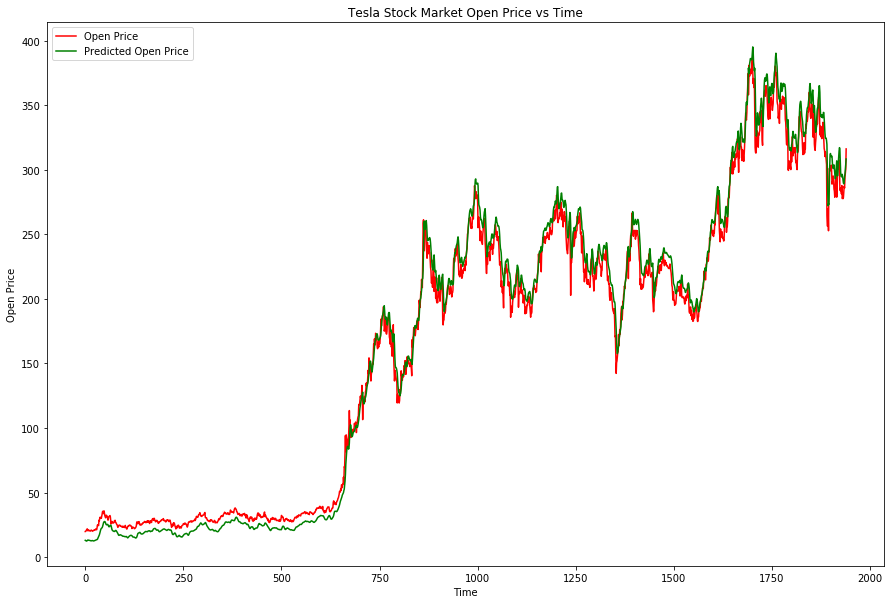

In [21]:
# plot predictions vs real turnover on training set
plt.figure(figsize=(15,10))
predicted = regressor.predict(X_train)
predicted = scaler.inverse_transform(predicted)
plt.plot(scaler.inverse_transform(train[-1940:]), color = 'red', label = 'Open Price')
plt.plot(predicted, color = 'green', label = 'Predicted Open Price')
plt.title('Tesla Stock Market Open Price vs Time')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [22]:
X_test.shape

(356, 60, 1)

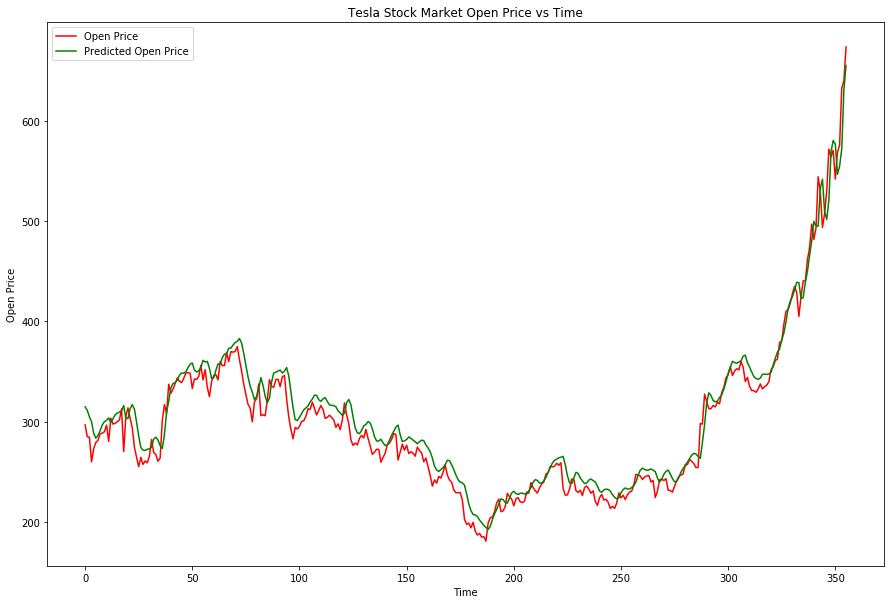

In [23]:
# plotting predictions vs true turnover for the test set
plt.figure(figsize=(15,10))
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform(predicted)
plt.plot(scaler.inverse_transform(test[-356:]), color = 'red', label = 'Open Price')
plt.plot(predicted, color = 'green', label = 'Predicted Open Price')
plt.title('Tesla Stock Market Open Price vs Time')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()